
# 1) Problem Description


### Goal: Applying Neural Networks to determine a classification problem

<p><span style="color:blue">Classification of Fashion-MNIST with a simple Convolution Neural Networks in Keras.We import datasets for fashion Mnist from keras library.
</span></p>


<table align='left'>
<tr>
<td><img src='https://raw.githubusercontent.com/margaretmz/deep-learning/master/images/modern%20dl_fash-mnist_keras.png' width='1000' /></td>
</tr>
</table>


## Break Down this notebook:


<p><span style="color:green">1. Loading the data from keras datasets:
</span></p>
    
- [Importing Libraries](#scrollTo=18xLQCydFHqi)
 
- [Extract dataset](#scrollTo=18xLQCydFHqi)

- [Features](#scrollTo=18xLQCydFHqi)
 
- [Examine Dimensions](#scrollTo=18xLQCydFHqi)
 
- [Examine NaN values](#scrollTo=18xLQCydFHqi)

<p><span style="color:green">2. Visualizing the Dataset:
</span></p>
    
- [Plotting Random Images](#scrollTo=18xLQCydFHqi)
 
- [Distribution of Labels](#scrollTo=18xLQCydFHqi)

<p><span style="color:green">3. Data PreProcessing:
</span></p>

- [Setting Random Seeds](#scrollTo=18xLQCydFHqi)
 
- [Splitting Data](#scrollTo=18xLQCydFHqi)
 
- [Reshaping Images](#scrollTo=18xLQCydFHqi)
 
- [Normalization](#scrollTo=18xLQCydFHqi)
 
- [One Hot Encoding](#scrollTo=18xLQCydFHqi)

<p><span style="color:green">4. Training ConvNet
</span></p>

 - [Building a ConvNet](#scrollTo=18xLQCydFHqi)
 
 - [Compiling Model](#scrollTo=18xLQCydFHqi)
 
 - [Model Summary](#scrollTo=18xLQCydFHqi)
 
 - [Learning Rate Decay](#scrollTo=18xLQCydFHqi)
 
 - [Data Augmentation](#scrollTo=18xLQCydFHqi)
 
 - [Fitting the Model](#scrollTo=18xLQCydFHqi)


### Libraries and Tools used in this project

For this activity, we will need a library specialized in deep learning called Keras. We will also use sklearn, a very complete library for machine learning in Python.  


<table align='left'>
<tr>
<td><img src='http://jricardon.github.io/BBS19lab2Files/figs/keras_logo.png' width='200' /></td>
    
<td><img src='https://cdn-images-1.medium.com/max/1200/1*00pL0zLnfI7y8d5G1aQrHA.jpeg' width='200' /></td>
    
<td><img src='https://matplotlib.org/_static/logo2.svg' width='200' /></td>
    
<td><img src='https://tse1.mm.bing.net/th?id=OIP.AvJibK-BbuwLDwzedOVIkAHaCl&pid=Api&P=0&w=456&h=160' width='200' /></td>   
    
</tr>
</table>


# 2) Loading the data from keras datasets:

### Importing libraries.

In [3]:
!pip install -q -U tensorflow>=1.8.0
import tensorflow as tf

import numpy as np # Handles table-like data and matrices :
import matplotlib.pyplot as plt #Library used for visualization.


<p><span style="color:red">References</span></p>

<blockquote>
    
[1] [Matplotlib](https://matplotlib.org/)
    
    
[2] [Numpy](https://numpy.org/)
    
[3] [Tensor Flow](https://www.tensorflow.org/)

### Extract dataset
   
we had used Fashion Mnist datasets from keras library.

<p><span style="color:blue">Dataset path: </span></p>

<blockquote>

https://keras.io/api/datasets/fashion_mnist/


<p><span style="color:blue">About Dataset</span></p>

MNIST dataset has the following features:

<blockquote>
    
1) Dataset size 60,000 samples of handwritten images.

2) The size of each image is 28x28 pixels.

3) Each image has only 1 color channel

4) Each pixel has value in the range of [0,255] where 0 represents black, and 255 represents white.

5) Each image has labeled from 0-9.

In [2]:
# Load the fashion-mnist pre-shuffled train data and test data
#Directly loading the data from keras dataset.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


### Labelling:

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover


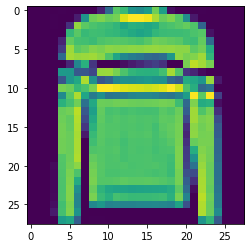

In [5]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')#training set 
print(x_test.shape[0], 'test set')#test set

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

### Data normalization
Normalize the data dimensions so that they are of approximately the same scale.

In [6]:
# You need to make sure that your Image is cast into double/float from int before you do this scaling 
# as you will most likely generate floating point numbers.
# And had it been int, the values will be truncated to zero.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

## 3) Number of examples for class?

 > Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

In [7]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


## 4) Describe the preprocessing operations you consider important to apply before training model?


 > Setting Random Seeds
 
 <p><span style="color:blue">Splitting Data:</span></p>

 > split the training data into Train and Validation Set. Train set is used for Training the model and       Validationset is used for Evaluating our Model's Performance on the Dataset.Further breaks training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
 
- Reshaping Images

-  Normalization

-  One Hot Encoding 


<p><span style="color:red">References:</span></p>
 <blockquote>   
    
Goodfellow, I., Bengio, Y., & Courville, A. (2016).[Deep Learning](https://books.google.it/books?hl=en&lr=&id=omivDQAAQBAJ&oi=fnd&pg=PR5&dq=+++++Goodfellow,+I.,+Bengio,+Y.,+%26+Courville,+A.+(2016).+Deep+learning+(adaptive+computation+and+machine+learning+series).+Adaptive+Computation+and+Machine+Learning+series,+800.&ots=MMV_ftmDQU&sig=Gy4MrK33Nmcjirnl7sEzgz26xBI&redir_esc=y#v=onepage&q&f=false) (adaptive computation and machine learning series). Adaptive Computation and Machine Learning series, 800.

### Split the data into train/validation/test data sets


- Training data - used for training the model
- Validation data - used for tuning the hyperparameters and evaluate the models
- Test data - used to test the model after the model has gone through initial vetting by the validation set.


In [8]:
#split the training data into Train and Validation Set. Train set is used for Training the model and Validation set is used for
#Evaluating our Model's Performance on the Dataset.
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)

(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]


#Note that we have Images as 1D vector each containing 784 pixels. Before we feed the data to the CNN we must reshape the data into (28x28x1) 3D matrices.
#This is because Keras wants an Extra Dimension in the end, for channels. If this had been RGB images, there would have been 3 channels, but as MNIST is gray scale it only uses one.
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)


# One-hot encode the labels:
#The labels are given as integers between 0-9.
#We need to one hot encode them , Eg 8 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0] .
#We have 10 digits [0-9] or classes, therefore we one-hot-encode the target variable with 10 classes
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


## 5) Propose a neural network  to solve the problem?

<img width='800'  align='left' src='http://jricardon.github.io/BBS19lab2Files/figs/main.jpg'>



### Training Convolution Neural Network:

#### Process:
   
<p><span style="color:blue">Step:1:  Sequential Keras API: </span></p>

> This is linear stack of layers for adding one layer at a time starting from input.   
 
<p><span style="color:blue">Step:2:  Convolutional Layers: </span></p>
    
>- Convolutional Layers are Building blocks of ConvNets. 
>- Convolutional Layers has set of Independent Filters whose depth is equal to Input and other  dimensions can be set manually. These Filters when convolved over the Input Image produce Feature Maps.

>> - It includes some HyperParameters which we input manually, such as:
              1)number of filters
              2)Dimensions of Filter (F)
              3)Stride (S) 
              4)Padding(P)....(Same Padding) 
              5)Activation Function etc......(Rectifier Activation Funtion) 
              
> Let the Input Volume Size be deonted by (W) ,Then, the Output will have Dimensions given by:

                      ........(Height, Width) = ( ( W − F + 2P ) / S ) + 1

> And the Depth will be equal to Number of Filters Specified.
    

<p><span style="color:blue">Step:3: Pooling Layers </span></p>

> - Pooling Layers are used for Dimensionality Reduction or DownSampling the Input. These are used where we have                   lot of Input Features. It reduces the amount of Parameters and Computational power required drastically, thus                   reducing Overfitting. These along with Convolutional layers are able to learn more Complex features of the                     Image.


<p><span style="color:blue">Step:4: Batch Normalization: </span></p>

> - Batch Normalizationis used for acheiving Zero mean and Variance one. It scales down outliers and forces the                     network to learn features in a distributed way, not relying too much on a Particular Weight and makes the                       model better Generalize the Images.


<p><span style="color:blue">Step:5: Dropout: </span></p>

> - Dropout is used for avoiding Overfitting. This randomly drops some percentage of neurons, and thus the weights gets            Re-Aligned. The remaining Neurons learn more features and this reduces the dependency on any one Neuron. DropOut is a          Regularization Technique, which Penalizes the Parameters. Generally we set the DropOutRate between 0.2-0.5.
    
<p><span style="color:blue">Step:6: Flatten layer:</span></p>

> - Flatten layer to map the input to a 1D vector. We then add Fully connected Layers after some                                   Convolutional/pooling layers. It combines all the Features of the Previous Layers.

<p><span style="color:blue">Step:7: Output Layer:</span></p>
    
> - Output Layer units equal to the number of classes to be identified. Here, we use 'sigmoid' function if it is                    Binary Classification otherwise 'softmax' activation function in case of Multi-Class Classification.


#### Kernel /Filter:


•	In the context of CNN, a filter is a set of learnable weights which are learned using the backpropagation algorithm. When you convolve this filter across the corresponding input, you are basically trying to find out the similarity between the stored template and different locations in the input.


#### Filter size:

•	Filter size refers to the dimensions of the filter/kernel in the ConvNet.


#### How can I decide Filter size?

•	You should initially use fewer filters and gradually increase and monitor the error rate to see how it is varying.
•	It is always a tradeoff between speed and accuracy. But there is several to-do

#### Kernel size:

smaller + deeper = better

Deeper - better up to some level. Wider - better, but at some level there is an accuracy saturation, and computations grow up quadratically.



<table align='left'>
<tr>
<td><img src='https://miro.medium.com/max/1400/1*uAeANQIOQPqWZnnuH-VEyw.jpeg' width='1000' /></td>    
</tr>
</table>

In [9]:
#Importing Deep Learning Libraries:
from keras.models import Sequential, load_model #which is just a linear stack of layers. We add one layer at a time starting from input
from keras.layers import Dense, Dropout, Flatten #To avoid Overfitting We add Dropout. This randomly drops some percentage of neurons, and thus the weights gets Re-Aligned.

# We add Batch Normalization where we acheive Zero mean and Variance one. It scales down outliers and forces the network to learn features in a distributed way, not relying too much on a Particular Weight and makes the model better Generalize the Images.

from keras.layers import Conv2D, MaxPooling2D, BatchNormalization #Filters when convolved over the Input Image produce Feature Maps.
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

#from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical


#Building a ConvNet

#process: 
model = Sequential()#Used for adding linear stack of layers

#In first convolution layer we use smaller size of filter(32) because intially as we are using cpu for executing the file we need to consider
#smaller filter size first.
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))#we used rectifier activation function to replace all negative values to '0' and reamain same for positive values.
model.add(BatchNormalization())#For achieving Zero mean and Variance one.


model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(BatchNormalization())
model.add(Dropout(0.25))#This randomly drops 0.25 percentage of neurons, and thus the weights gets Re-Aligned.


#In this convolution layer we use size of filter(64):
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(2, 2)))#Here we use max_pooling with(2,2) size so that we can consider the maximum value of the matric for reducing the size of convolution matrices.
model.add(Dropout(0.25))#This randomly drops 0.25 percentage of neurons, and thus the weights gets Re-Aligned.
    
#In this convolution layer we use  size of filter(128):   
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(BatchNormalization())
model.add(Dropout(0.25))#This randomly drops 0.25 percentage of neurons, and thus the weights gets Re-Aligned.
    

model.add(Flatten())#Flattening:To get single vector from pooling inorder to be input of ANN
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))#This randomly drops 0.5 percentage of neurons, and thus the weights gets Re-Aligned.
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())#For achieving Zero mean and Variance one.
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()#gives the entire description of layers used.

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)       

## 6) Propose a methodology to train the model.Explaining how do you plan to split the available data

1) choosing Hyper parameters

2) model overfitting


### Compiling The Model:

> We need to compile the model. We have to specify the optimizer used by the model We have many choices like Adam, RMSprop etc.. 

> Next we need to specify the loss function for the neural network which we want to minimize.

##### For Binary Classification we use "binary_crossentropy" and for Multi-class Classification we use "categorical_crossentropy".

> Finally, We need to specify the metric to evaluate our models performance. Here I have used accuracy.



In [10]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )#we use less learning rate such that it is not too high to take very large steps, neither it should be too small , which would not alter the Weights and Biases.

model.compile(loss='categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])#as we need to do multi-class classification we use catgorical cross entropy as loss function

In [8]:
model.summary()#gives the entire description of layers used.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)       

## 7) provide graph to show the training process as a function of number of training iterations?

### Fitting The Model:


In [9]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=50,#No of times to run and for checking the accuracy 
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Train on 55000 samples, validate on 5000 samples
Epoch 1/50
55000/55000 [==============================] - 643s 12ms/step - loss: 0.5126 - accuracy: 0.8222 - val_loss: 0.8953 - val_accuracy: 0.6742

Epoch 00001: val_loss improved from inf to 0.89528, saving model to model.weights.best.hdf5
Epoch 2/50
55000/55000 [==============================] - 640s 12ms/step - loss: 0.3242 - accuracy: 0.8852 - val_loss: 0.2499 - val_accuracy: 0.9104

Epoch 00002: val_loss improved from 0.89528 to 0.24994, saving model to model.weights.best.hdf5
Epoch 3/50
55000/55000 [==============================] - 641s 12ms/step - loss: 0.2653 - accuracy: 0.9046 - val_loss: 0.2241 - val_accuracy: 0.9190

Epoch 00003: val_loss improved from 0.24994 to 0.22406, saving model to model.weights.best.hdf5
Epoch 4/50
55000/55000 [==============================] - 653s 12ms/step - loss: 0.2370 - accuracy: 0.9148 - val_loss: 0.2074 - val_accuracy: 0.9216

Epoch 00004: val_loss improved from 0.22406 to 0.20738, saving mode

55000/55000 [==============================] - 572s 10ms/step - loss: 0.0295 - accuracy: 0.9899 - val_loss: 0.2256 - val_accuracy: 0.9468

Epoch 00042: val_loss did not improve from 0.17817
Epoch 43/50
55000/55000 [==============================] - 570s 10ms/step - loss: 0.0253 - accuracy: 0.9915 - val_loss: 0.2413 - val_accuracy: 0.9454

Epoch 00043: val_loss did not improve from 0.17817
Epoch 44/50
55000/55000 [==============================] - 574s 10ms/step - loss: 0.0272 - accuracy: 0.9911 - val_loss: 0.2528 - val_accuracy: 0.9398

Epoch 00044: val_loss did not improve from 0.17817
Epoch 45/50
55000/55000 [==============================] - 573s 10ms/step - loss: 0.0281 - accuracy: 0.9906 - val_loss: 0.2603 - val_accuracy: 0.9408

Epoch 00045: val_loss did not improve from 0.17817
Epoch 46/50
55000/55000 [==============================] - 572s 10ms/step - loss: 0.0231 - accuracy: 0.9918 - val_loss: 0.2617 - val_accuracy: 0.9414

Epoch 00046: val_loss did not improve from 0.17817
Ep

## 8) Evaluate the model?


In [10]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy

print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9399999976158142


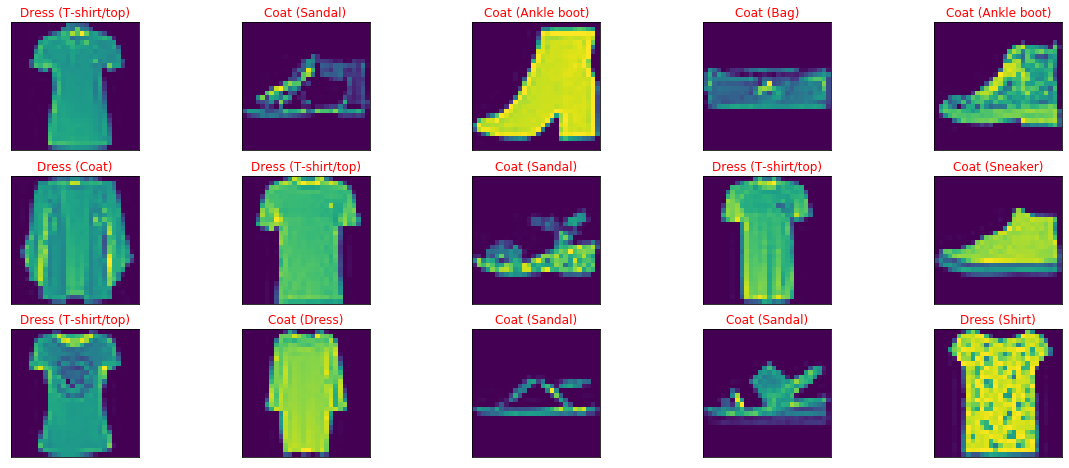

In [11]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

###  Sucessfully Obtained 94% Accuracy

## 9) Provide breif conclusion of your work? 

### conclusion: 
> We had taken fashion Mnist classification problem as our goal to classify each term with respect to their category. this we had solved by considering simple convolution neural networks.Fashion Mnist datasets are imported directly from keras library.Initially we had done data preprocessing,Modulating data based on the requirment like data normalization,reshaping images,one-hot encoding.we splitted the datasets into two categories training the data(60,000) and testing the datasets (10000).Now training the model architecture with several layers, as mentioned above.we use dseveral hyper tunning parameters like optimizers,learning rate and epochs in order to train the model perfectly to achieve good accuracy. 

<p><span style="color:red">References</span></p>

> [1] [Keras](https://keras.io/guides/)

> [2] [Matplotlib](https://matplotlib.org/)
    
> [3] [Numpy](https://numpy.org/)
    
> [4] [Tensor Flow](https://www.tensorflow.org/)

> [5] Fashion MNIST, An MNIST-like dataset of 70,000 28x28 labeled fashion images, https://www.kaggle.com/zalando-research/fashionmnist

> [6] Goodfellow, I., Bengio, Y., & Courville, A. (2016).[Deep Learning](https://books.google.it/books?hl=en&lr=&id=omivDQAAQBAJ&oi=fnd&pg=PR5&dq=+++++Goodfellow,+I.,+Bengio,+Y.,+%26+Courville,+A.+(2016).+Deep+learning+(adaptive+computation+and+machine+learning+series).+Adaptive+Computation+and+Machine+Learning+series,+800.&ots=MMV_ftmDQU&sig=Gy4MrK33Nmcjirnl7sEzgz26xBI&redir_esc=y#v=onepage&q&f=false) (adaptive computation and machine learning series). Adaptive Computation and Machine Learning series, 800.

> [7] Dropout: A Simple Way to Prevent Neural Networks from Overfitting, https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf